In [ ]:
from google.colab import files
files.upload()  # Se abrirá  un diálogo para que subas el archivo kaggle.json


Saving kaggle (6).json to kaggle (6).json


{'kaggle (6).json': b'{"username":"eddyarias","key":"da0e8449e6b92da62bc40f739b628e12"}'}

In [ ]:
!mkdir -p ~/.kaggle  # Crea el directorio ~/.kaggle si no existe
!mv /content/kaggle\ \(6\).json ~/.kaggle/kaggle.json  # Mueve el archivo y lo renombra a kaggle.json


mv: cannot stat '/content/kaggle (6).json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls -l ~/.kaggle/

total 4
-rw------- 1 root root 65 Sep 25 23:26 kaggle.json


In [ ]:
!pip install kaggle

Dataset: paultimothymooney/chest-xray-pneumonia

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.27G/2.29G [00:13<00:00, 175MB/s]
100% 2.29G/2.29G [00:14<00:00, 176MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip -d ./dataset-folder

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: ./datas

In [ ]:
import os

# Ruta donde descomprimiste el dataset
dataset_path = './dataset-folder'  # Reemplaza esto con la ruta correcta

# Inicializar un diccionario para almacenar la información
estructura_directorios = {}

# Función para contar archivos y organizar la estructura
def contar_archivos_y_estructura(path):
    for root, dirs, files in os.walk(path):
        # Inicializar contadores
        conteo_imagenes = 0
        conteo_otros = 0
        tipos_archivos = set()

        for file in files:
            # Contar imágenes
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                conteo_imagenes += 1
            else:
                conteo_otros += 1
                # Añadir tipo de archivo
                tipo_archivo = file.split('.')[-1]  # Obtener extensión
                tipos_archivos.add(tipo_archivo)

        # Almacenar la información en el diccionario
        estructura_directorios[root] = {
            'cantidad_imagenes': conteo_imagenes,
            'cantidad_otros': conteo_otros,
            'tipos_archivos': list(tipos_archivos)
        }

# Contar archivos y obtener la estructura
contar_archivos_y_estructura(dataset_path)

# Imprimir la estructura en forma de árbol
def imprimir_estructura(directorio_dict):
    for directorio, info in directorio_dict.items():
        print(f"Directorio: {directorio}")
        print(f"  Cantidad de imágenes: {info['cantidad_imagenes']}")
        print(f"  Cantidad de otros archivos: {info['cantidad_otros']}")
        print(f"  Tipos de archivos: {', '.join(info['tipos_archivos'])}")

# Imprimir la estructura
imprimir_estructura(estructura_directorios)



Directorio: ./dataset-folder
  Cantidad de imágenes: 0
  Cantidad de otros archivos: 0
  Tipos de archivos: 
Directorio: ./dataset-folder/chest_xray
  Cantidad de imágenes: 0
  Cantidad de otros archivos: 0
  Tipos de archivos: 
Directorio: ./dataset-folder/chest_xray/val
  Cantidad de imágenes: 0
  Cantidad de otros archivos: 0
  Tipos de archivos: 
Directorio: ./dataset-folder/chest_xray/val/PNEUMONIA
  Cantidad de imágenes: 8
  Cantidad de otros archivos: 0
  Tipos de archivos: 
Directorio: ./dataset-folder/chest_xray/val/NORMAL
  Cantidad de imágenes: 8
  Cantidad de otros archivos: 0
  Tipos de archivos: 
Directorio: ./dataset-folder/chest_xray/train
  Cantidad de imágenes: 0
  Cantidad de otros archivos: 0
  Tipos de archivos: 
Directorio: ./dataset-folder/chest_xray/train/PNEUMONIA
  Cantidad de imágenes: 3875
  Cantidad de otros archivos: 0
  Tipos de archivos: 
Directorio: ./dataset-folder/chest_xray/train/NORMAL
  Cantidad de imágenes: 1341
  Cantidad de otros archivos: 0
  T

### Análisis General

*   **Cantidad Total de Imágenes**:
    *   **Total de Imágenes en `train`**: 1341 (NORMAL) + 3875 (PNEUMONIA) = **5216 imágenes**
    *   **Total de Imágenes en `val`**: 8 (NORMAL) + 8 (PNEUMONIA) = **16 imágenes**
    *   **Total de Imágenes en `test`**: 234 (NORMAL) + 390 (PNEUMONIA) = **624 imágenes**

*   **Clasificación de las Imágenes**:
    *   Las imágenes están clasificadas en dos categorías: **NORMAL** y **PNEUMONIA**, tanto en los conjuntos de entrenamiento como en los de prueba y validación. Esto sugiere que el dataset está diseñado para tareas de clasificación, posiblemente para un modelo de aprendizaje automático que clasifica radiografías de tórax.


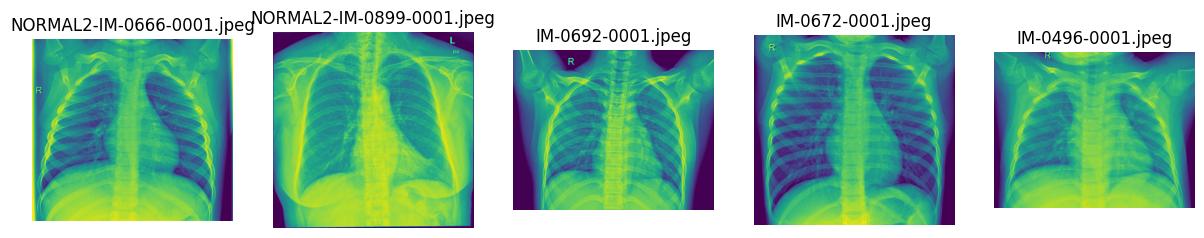

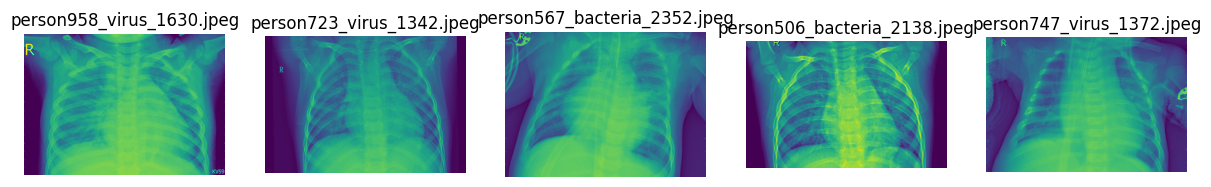

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Función para mostrar imágenes
def mostrar_imagenes(directorio, num_imagenes=5):
    imagenes = [f for f in os.listdir(directorio) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    plt.figure(figsize=(15, 5))
    for i in range(min(num_imagenes, len(imagenes))):
        img_path = os.path.join(directorio, imagenes[i])
        img = Image.open(img_path)
        plt.subplot(1, num_imagenes, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(imagenes[i])
    plt.show()

# Mostrar algunas imágenes de cada clase en el conjunto de entrenamiento
mostrar_imagenes('./dataset-folder/chest_xray/chest_xray/train/NORMAL')
mostrar_imagenes('./dataset-folder/chest_xray/chest_xray/train/PNEUMONIA')


# Intento con TPU de colab

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_metrics(predictions, labels):
    """Calcular métricas de rendimiento"""
    # Convertir tensores a numpy arrays
    predictions = predictions.cpu().numpy()
    labels = labels.cpu().numpy()

    # Calcular las métricas
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)

    return accuracy, precision, recall, f1

def plot_confusion_matrix(y_true, y_pred):
    """Graficar la matriz de confusión"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
    plt.ylabel('Actual')
    plt.xlabel('Predicción')
    plt.title('Matriz de Confusión')
    plt.show()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/17], Train Loss: 0.3231, Validation Loss: 0.3920, Accuracy: 0.8397
Epoch [2/17], Train Loss: 0.2227, Validation Loss: 0.3146, Accuracy: 0.8862
Epoch [3/17], Train Loss: 0.2150, Validation Loss: 0.2680, Accuracy: 0.8974
Epoch [4/17], Train Loss: 0.1868, Validation Loss: 0.1981, Accuracy: 0.9183
Epoch [5/17], Train Loss: 0.1739, Validation Loss: 0.2366, Accuracy: 0.9022
Epoch [6/17], Train Loss: 0.1733, Validation Loss: 0.1620, Accuracy: 0.9295
Epoch [7/17], Train Loss: 0.1600, Validation Loss: 0.2850, Accuracy: 0.9022
Epoch [8/17], Train Loss: 0.1637, Validation Loss: 0.2059, Accuracy: 0.9183
Epoch [9/17], Train Loss: 0.1574, Validation Loss: 0.2132, Accuracy: 0.9054
Epoch [10/17], Train Loss: 0.1544, Validation Loss: 0.1736, Accuracy: 0.9215
Epoch [11/17], Train Loss: 0.1554, Validation Loss: 0.1696, Accuracy: 0.9359
Epoch [12/17], Train Loss: 0.1426, Validation Loss: 0.2531, Accuracy: 0.9167
Epoch [13/17], Train Loss: 0.1468, Validation Loss: 0.2013, Accuracy: 0.9151
Epoch [1

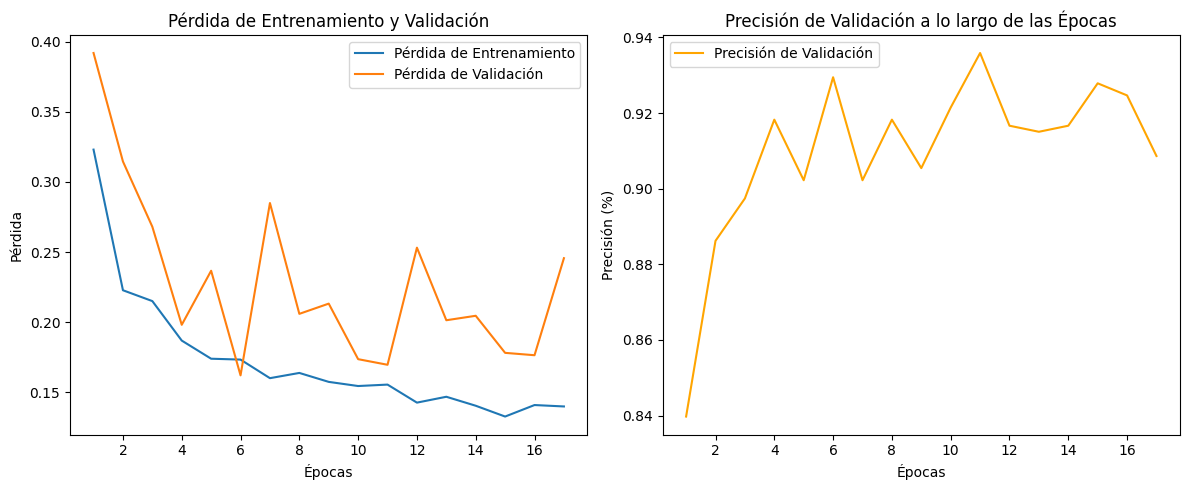

In [ ]:
# Instalar torch_xla
!pip install cloud-tpu-client torch_xla

# Importar las bibliotecas necesarias
import os
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm  # Barra de progreso

# Importar torch_xla para usar TPU
import torch_xla
import torch_xla.core.xla_model as xm
import torch_xla.distributed.parallel_loader as pl
import torch_xla.utils.serialization as xser
import torchvision.models as models


# Configurar dispositivo TPU
device = xm.xla_device()

# Definir las transformaciones con data augmentation para el conjunto de entrenamiento
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convertir a escala de grises
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(112),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalización para un solo canal (gris)
])

# Definir las transformaciones para validación y prueba (sin data augmentation)
val_test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convertir a escala de grises
    transforms.Resize((112, 112)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalización para un solo canal (gris)
])

# Cargar los datasets con las transformaciones aplicadas
train_dataset = datasets.ImageFolder(root='./dataset-folder/chest_xray/chest_xray/train', transform=train_transform)
# val_dataset = datasets.ImageFolder(root='./dataset-folder/chest_xray/chest_xray/val', transform=val_test_transform)
test_dataset = datasets.ImageFolder(root='./dataset-folder/chest_xray/chest_xray/test', transform=val_test_transform)

# Definir el tamaño del batch
batch_size = 64

# Crear DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Definir el modelo ResNet50
class ResNet50(nn.Module):
    def __init__(self):
        super(ResNet50, self).__init__()

        # Cargar el modelo preentrenado de ResNet50
        self.resnet = models.resnet50(pretrained=True)

        # Cambiar la primera capa para que acepte imágenes en escala de grises
        self.resnet.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

        # Cambiar la última capa para que produzca una salida de 1 en lugar de 1000 (para clasificación binaria)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 1)

    def forward(self, x):
        return torch.sigmoid(self.resnet(x))

# Inicializar el modelo y moverlo al dispositivo TPU
model = ResNet50().to(device)

# Definir el optimizador y la función de pérdida
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.BCELoss()  # Para clasificación binaria

num_epochs = 17

# Listas para almacenar las métricas
train_losses = []
val_losses = []
val_accuracies = []

# Entrenamiento y evaluación
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in pl.ParallelLoader(train_loader, [device]).per_device_loader(device):
        images, labels = images.to(device), labels.to(device)
        labels = labels.float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        xm.optimizer_step(optimizer)  # Optimización en TPU

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Evaluación en el conjunto de validación
    model.eval()
    val_predictions = []
    val_labels = []
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in pl.ParallelLoader(test_loader, [device]).per_device_loader(device):
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)

            outputs = model(images)
            val_loss += criterion(outputs, labels).item()
            predicted = (outputs > 0.5).float()

            val_predictions.extend(predicted.flatten().cpu().numpy())
            val_labels.extend(labels.flatten().cpu().numpy())

    # Calcular métricas
    accuracy, precision, recall, f1 = calculate_metrics(torch.tensor(val_predictions), torch.tensor(val_labels))
    val_losses.append(val_loss / len(test_loader))
    val_accuracies.append(accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {avg_loss:.4f}, '
          f'Validation Loss: {val_losses[-1]:.4f}, '
          f'Accuracy: {accuracy:.4f}')

# Graficar pérdidas de entrenamiento y validación
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Pérdida de Entrenamiento')
plt.plot(range(1, num_epochs + 1), val_losses, label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida de Entrenamiento y Validación')
plt.legend()

# Graficar precisiones de validación
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Precisión de Validación', color='orange')
plt.xlabel('Épocas')
plt.ylabel('Precisión (%)')
plt.title('Precisión de Validación a lo largo de las Épocas')
plt.legend()

plt.tight_layout()
plt.show()


# Crear un cnn

In [ ]:
!pip install torch torchvision matplotlib


In [ ]:
# Importar las bibliotecas necesarias
import os
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm  # Barra de progreso

# Configurar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cpu')

## Preparar los Datos
Usaremos torchvision para cargar los datos y realizar las transformaciones necesarias, como la normalización y el aumento de datos.

In [ ]:

# Definir las transformaciones con data augmentation para el conjunto de entrenamiento
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convertir a escala de grises
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalización para un solo canal (gris)
])

# Definir las transformaciones para validación y prueba (sin data augmentation)
val_test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convertir a escala de grises
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalización para un solo canal (gris)
])

# Cargar los datasets con las transformaciones aplicadas
train_dataset = datasets.ImageFolder(root='./dataset-folder/chest_xray/chest_xray/train', transform=train_transform)
# val_dataset = datasets.ImageFolder(root='./dataset-folder/chest_xray/chest_xray/val', transform=val_test_transform)
test_dataset = datasets.ImageFolder(root='./dataset-folder/chest_xray/chest_xray/test', transform=val_test_transform)

# Definir el tamaño del batch
batch_size = 128

# Crear DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


## Definir la Red Neuronal Convolucional

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms

class ResNet50(nn.Module):
    def __init__(self):
        super(ResNet50, self).__init__()

        # Cargar el modelo preentrenado de ResNet50
        self.resnet = models.resnet50(pretrained=True)

        # Cambiar la primera capa para que acepte imágenes en escala de grises
        self.resnet.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

        # Cambiar la última capa para que produzca una salida de 1 en lugar de 1000 (para clasificación binaria)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 1)

    def forward(self, x):
        return torch.sigmoid(self.resnet(x))


# Ejemplo de cómo usar el modelo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ResNet50().to(device)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 155MB/s]


In [ ]:
# Inicializar el modelo y moverlo al dispositivo
model = ResNet50().to(device)

# Definir el optimizador y la función de pérdida
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()  # Para clasificación binaria

num_epochs= 7

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Listas para almacenar las métricas
train_losses = []
val_losses = []
val_accuracies = []

# Entrenamiento y evaluación
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        labels = labels.float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Evaluación en el conjunto de validación
    model.eval()
    val_predictions = []
    val_labels = []
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)

            outputs = model(images)
            val_loss += criterion(outputs, labels).item()
            predicted = (outputs > 0.5).float()

            val_predictions.extend(predicted.flatten().cpu().numpy())
            val_labels.extend(labels.flatten().cpu().numpy())

    # Calcular métricas
    accuracy, precision, recall, f1 = calculate_metrics(torch.tensor(val_predictions), torch.tensor(val_labels))
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {avg_loss:.4f}, '
          f'Validation Loss: {val_losses[-1]:.4f}, '
          f'Accuracy: {accuracy:.4f}')

# Graficar pérdidas de entrenamiento y validación
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Pérdida de Entrenamiento')
plt.plot(range(1, num_epochs + 1), val_losses, label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida de Entrenamiento y Validación')
plt.legend()

# Graficar precisiones de validación
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Precisión de Validación', color='orange')
plt.xlabel('Épocas')
plt.ylabel('Precisión (%)')
plt.title('Precisión de Validación a lo largo de las Épocas')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/7], Train Loss: 0.4623, Validation Loss: 0.7443, Accuracy: 0.5625
Epoch [2/7], Train Loss: 0.4148, Validation Loss: 0.6378, Accuracy: 0.5625
Epoch [3/7], Train Loss: 0.3912, Validation Loss: 0.7950, Accuracy: 0.7500


KeyboardInterrupt: 

## Cálculo de Dimensiones

Para corregir este problema, es crucial calcular correctamente el tamaño de la salida después de cada capa convolucional y de "pooling". Considerando que la entrada es de 224x224 y que se aplican cuatro capas de "pooling" con un `kernel_size=2` y `stride=2`, el tamaño de la imagen se reduce a la mitad en cada capa de "pooling".

### Dimensiones después de las capas de "pooling":

1. Después de la primera capa de "pooling": 224 / 2 = 112
2. Después de la segunda capa de "pooling": 112 / 2 = 56
3. Después de la tercera capa de "pooling": 56 / 2 = 28
4. Después de la cuarta capa de "pooling": 28 / 2 = 14
Esto significa que la salida de la última capa convolucional tendrá un tamaño de **14x14** con **128 canales**.

### Cálculo de la entrada a `fc1`

Por lo tanto, el número total de elementos que deben entrar a la primera capa completamente conectada (`fc1`) es:
\[
128 \times 14 \times 14 = 25088
\]

In [ ]:
import torch.nn.functional as F

# Definir una arquitectura de CNN más sencilla con Sigmoid en la salida
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3,3), stride=1, padding=1)
        # self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)#, padding=0)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3), stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)#, padding=0)
        # self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)#, padding=0)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), stride=1, padding=1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)#, padding=0)

        self.fc1 = nn.Linear(128 * 14 * 14, 200)  # Dimensiones corregidas
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 50)
        self.fc4 = nn.Linear(50, 1)
        # self.bn_fc1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(p=0.5)
        self.dropout2 = nn.Dropout(p=0.4)

        # self.fc2 = nn.Linear(128, 1)
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))

        x = x.view(-1, 128 * 14 * 14)  # Dimensiones corregidas
        x = self.dropout1(F.relu(self.fc1(x)))
        x = self.dropout2(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return torch.sigmoid(x)

In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, score):
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0


In [ ]:
# Crear una instancia del modelo y moverlo al dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
device

device(type='cpu')

##Configurar la Pérdida y el Optimizador

In [ ]:
# Configurar la función de pérdida y el optimizador
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)



## Entrenamiento del Modelo

In [ ]:
import torch

torch.cuda.empty_cache()


In [ ]:
# Inicializar Early Stopping
early_stopping = EarlyStopping(patience=8, verbose=True)

# Definir número de épocas
num_epochs = 3

# Listas para almacenar las métricas
train_losses = []
val_accuracies = []
best_accuracy = 0.0

# Entrenamiento
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    pbar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch')

    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        labels = labels.float().unsqueeze(1)

        outputs = model(images)

        # Verificar tamaños
        # print(f'Outputs size: {outputs.size()}, Labels size: {labels.size()}')

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pbar.set_postfix(loss=loss.item())

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    model.eval()
    correct = 0
    total = 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)

            outputs = model(images)
            val_loss += criterion(outputs, labels).item()

            predicted = (outputs > 0.5).float()

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    avg_val_loss = val_loss / len(val_loader)
    val_accuracies.append(accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {avg_loss:.4f}, '
          f'Validation Loss: {avg_val_loss:.4f}, '
          f'Validation Accuracy: {accuracy:.2f}%')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        torch.save(model.state_dict(), 'best_model.pth')

    early_stopping(avg_val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered")
        break

Epoch 1/3: 100%|██████████| 41/41 [01:36<00:00,  2.35s/batch, loss=29.2]


Epoch [1/3], Train Loss: 25.7304, Validation Loss: 50.0000, Validation Accuracy: 50.00%


Epoch 2/3:  95%|█████████▌| 39/41 [01:38<00:05,  2.53s/batch, loss=30.5]


KeyboardInterrupt: 

## Evaluación del Modelo

In [ ]:
# Graficar las métricas
plt.figure(figsize=(12, 5))

# Graficar pérdida
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, marker='o')
plt.title('Precisión en el Conjunto de Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión (%)')

plt.tight_layout()
plt.show()
